In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
dirname = "sotsuken/"
os.makedirs(dirname, exist_ok=True)
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
import scipy.linalg as la

import quantecon as qe

In [89]:
# ずっと使ってきたやつ
set_parameter = 3

# ch10
# set_parameter = 2

In [90]:
# 効用関数の設定
# LQR_util = 2で効用をマイナスに設定
# LQR_util = 2ではLQRの重み行列が正定値行列とならず破綻
LQR_util = 3

In [91]:
if set_parameter == 1:
    # Set parameters ずっと使ってきたやつ
    mu_d = 13.0
    rho = 0.05
    gan = 8.0
    c_d = 1.0
    beta_std = 0.95
    R_kinri = 1 / beta_std
    ponji = 1e-9
elif set_parameter == 2:
    # Set parameters in ch10
    mu_d = 13.594
    rho = 0.241
    gan = 500.0
    c_d = 0.2
    beta_std = 0.997
    R_kinri = 1 / beta_std
    ponji = 1e-9
elif set_parameter == 3:
    # 自由に変えていいよ
    mu_d = 0.
    rho = 0.05
    gan = 0.
    c_d = 1.0
    #beta_std = 0.9494764430324878
    beta_std = 0.95
    R_kinri = 1 / beta_std
    ponji = 0

In [92]:
# uncertaintyあり、なし全ての期間を決定
iter_t = 1500
iter_uti= iter_t

In [93]:
np.random.seed(7)
eps = np.random.randn(iter_t)

In [94]:
sig_arr = [-1e-9, -1e-1]
d_first = 0.0
k_first = 0.0

In [95]:
ovr = 50
tapple_y = 20
y_lim = (-ovr, ovr)

In [96]:
# おまじない
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
# olrprobust_3はリカッチのif文を削除した
# olrprobust_2との相違点は上記があるか、ないか
from olrprobust_3_using import olrp, olrprobust, doubleo

# olrprobust_2はリカッチのif文有〼
# matlabを極力そのまま移し替えた。
# from olrprobust_2_using import olrp, olrprobust, doubleo

# olrprobust_1はgithubから
# from olrprobust_1_using import olrp,olrprobust,doubleo

In [98]:
# y=[d k]のやつ
QLQ_mat = np.array([[0.0, 0.0], [0.0, 0.]])
ALQ_mat = np.array(
    [[rho, 0.0], [1.0, R_kinri]]
)
# u=\gamma - c_tにしたため符号を反転した
BLQ_mat = np.array([[0.0], [1.0]])
CLQ_mat = np.array([ [c_d], [0.0]])
RLQ_mat = np.array([[1]])

if LQR_util == 2:
    RLQ_mat = -RLQ_mat
    QLQ_mat = -QLQ_mat
F_nomis_mat, K_nomis_mat, P_nomis_mat, Pt_nomis_mat = olrprobust(
    beta_std, ALQ_mat, BLQ_mat, CLQ_mat, QLQ_mat, RLQ_mat, sig_arr[0]
)
print(f"F = {F_nomis_mat[0]}")

print(P_nomis_mat)
print(np.linalg.eigvals(P_nomis_mat))

F = [0.05249346 0.0526316 ]
[[0.55111243 0.55256272]
 [0.55256272 0.55401683]]
[0.         1.10512926]


In [99]:
y_nomis_mat = np.array([[d_first, k_first]])
ABF_nomis_mat = ALQ_mat - BLQ_mat @ F_nomis_mat
for i in range(iter_t):
    y_nomis_mat = np.insert(
        y_nomis_mat, 0, ABF_nomis_mat @ y_nomis_mat[0].T + CLQ_mat.T * eps[i], axis=0
    )

In [100]:
# 0-iter_tまでのiter_t+1の長さになっている。
y_nomis_mat = y_nomis_mat[::-1]
k_nomis_mat = y_nomis_mat[:, 1]
d_nomis_mat = y_nomis_mat[:, 0]

In [101]:
print(f"y.shape = {y_nomis_mat.shape}")

y.shape = (1501, 2)


In [102]:
c_nomis_mat = np.zeros(iter_t + 1)
for i in range(iter_t + 1):
    c_nomis_mat[i] = F_nomis_mat @ y_nomis_mat[i] 
print(f"c.shape = {c_nomis_mat.shape}")

c.shape = (1501,)


mis mat


In [103]:
F_mis_mat, K_mis_mat, P_mis_mat, Pt_mis_mat = olrprobust(
    beta_std, ALQ_mat, BLQ_mat, CLQ_mat, QLQ_mat, RLQ_mat, sig_arr[1]
)
print(f"F = {F_mis_mat[0]}")
y_mis_mat = np.array([[d_first, k_first]])
ABF_mis_mat = ALQ_mat - BLQ_mat @ F_mis_mat
for i in range(iter_t):
    y_mis_mat = np.insert(
        y_mis_mat, 0, ABF_mis_mat @ y_mis_mat[0].T + CLQ_mat.T * eps[i], axis=0
    )
y_mis_mat = y_mis_mat[::-1]
k_mis_mat = y_mis_mat[:, 1]
d_mis_mat = y_mis_mat[:, 0]
c_mis_mat = np.zeros(iter_t + 1)
for i in range(iter_t+1):
    c_mis_mat[i] = F_mis_mat @ y_mis_mat[i] 
print(f"F= {F_mis_mat}")

F = [-1.11419796 -1.11713006]
F= [[-1.11419796 -1.11713006]]


C:\Users\theko\AppData\Local\Temp\ipykernel_23960\2847337108.py:9: RuntimeWarning: overflow encountered in matmul
  y_mis_mat, 0, ABF_mis_mat @ y_mis_mat[0].T + CLQ_mat.T * eps[i], axis=0
C:\Users\theko\AppData\Local\Temp\ipykernel_23960\2847337108.py:9: RuntimeWarning: invalid value encountered in matmul
  y_mis_mat, 0, ABF_mis_mat @ y_mis_mat[0].T + CLQ_mat.T * eps[i], axis=0


In [104]:
import numpy.linalg as LA

In [105]:
stab=ALQ_mat-BLQ_mat@F_mis_mat
LA.eig(stab)

(array([2.16976164, 0.05      ]),
 array([[ 0.        ,  0.70803535],
        [ 1.        , -0.70617699]]))

In [106]:
LA.eig(ALQ_mat)

(array([1.05263158, 0.05      ]),
 array([[ 0.        ,  0.70803535],
        [ 1.        , -0.70617699]]))

In [110]:
LA.eig(P_mis_mat)

(array([-1.77635684e-15, -2.34568802e+01]),
 array([[ 0.70803535,  0.70617699],
        [-0.70617699,  0.70803535]]))

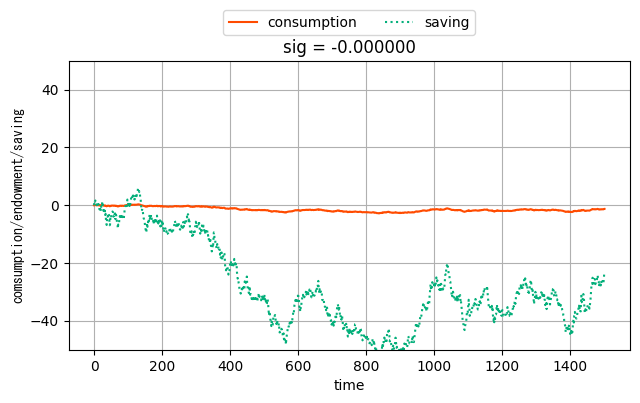

In [107]:

plt.figure(figsize=[6.5, 4.2])
plt.title("sig = %f" % (sig_arr[0]))
plt.ylim(y_lim)
colorlist = ["#FF4B00", "#005AFF", "#03AF7A"]
# Plot consumption
plt.plot(
    np.array(range(iter_t+1)),
    c_nomis_mat[:iter_t+1],
    linestyle="-",
    label="consumption",
    color=colorlist[0],
)

# Plot endowment
#plt.plot(
#    np.array(range(iter_t)),
#    d_nomis_mat[:iter_t],
#    linestyle="--",
#    label="endowment",
#    color=colorlist[1],
#)

# Plot saving
plt.plot(
    np.array(range(iter_t)),
    k_nomis_mat[1:iter_t+1],
    linestyle=":",
    label="saving",
    color=colorlist[2],
)

# Legend with specified arguments
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=3, prop={"size": 10})
plt.xlabel("time", fontsize=10)
plt.ylabel("comsumption/endowment/saving", fontname="MS Gothic", fontsize=10)
plt.grid()
plt.tight_layout()
plt.savefig("%sch10_1.png" % dirname)

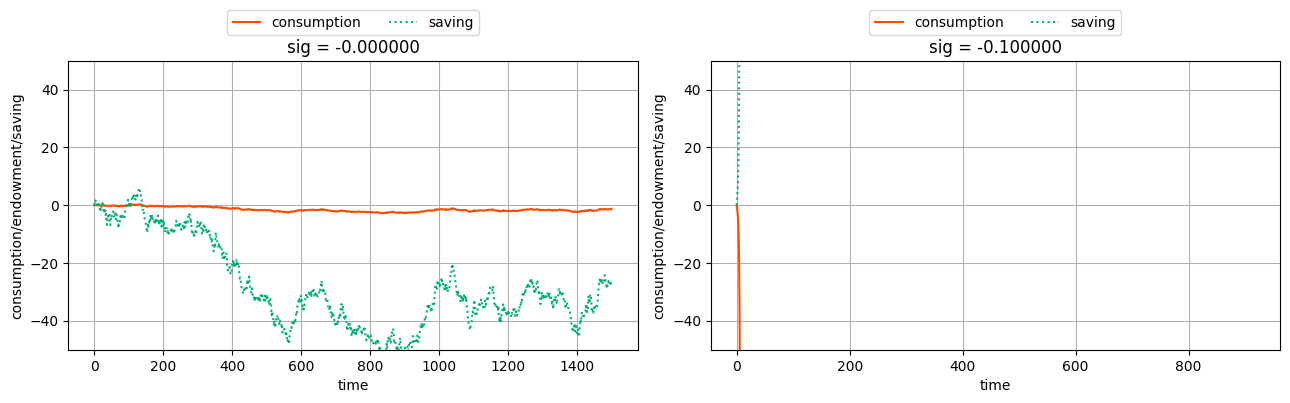

In [108]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[13, 4.2])
#fig.suptitle(f"ponji = {ponji}", fontsize=16)

# Plot for the left side
axes[1].set_title(f"sig = {sig_arr[1]:.6f}")
axes[1].set_ylim(y_lim)
axes[1].plot(
    np.array(range(iter_t)),
    c_mis_mat[:iter_t],
    linestyle="-",
    label="consumption",
    color=colorlist[0],
)
""" axes[1].plot(
    np.array(range(iter_t)),
    d_mis_mat[:iter_t],
    linestyle="--",
    label="endowment",
    color=colorlist[1],
) """
axes[1].plot(
    np.array(range(iter_t - 1)),
    k_mis_mat[1:iter_t],
    linestyle=":",
    label="saving",
    color=colorlist[2],
)
axes[1].legend(loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=3, prop={"size": 10})
axes[1].set_xlabel("time", fontsize=10)
axes[1].set_ylabel("consumption/endowment/saving", fontsize=10)
axes[1].grid()

# Plot for the right side
axes[0].set_title(f"sig = {sig_arr[0]:.6f}")
axes[0].set_ylim(y_lim)
axes[0].plot(
    np.array(range(iter_t)),
    c_nomis_mat[:iter_t],
    linestyle="-",
    label="consumption",
    color=colorlist[0],
)
""" axes[0].plot(
    np.array(range(iter_t)),
    d_nomis_mat[:iter_t],
    linestyle="--",
    label="endowment",
    color=colorlist[1],
) """
axes[0].plot(
    np.array(range(iter_t - 1)),
    k_nomis_mat[1:iter_t],
    linestyle=":",
    label="saving",
    color=colorlist[2],
)
axes[0].legend(loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=3, prop={"size": 10})
axes[0].set_xlabel("time", fontsize=10)
axes[0].set_ylabel("consumption/endowment/saving", fontsize=10)
axes[0].grid()
#--------------------
"""axes[2].set_title(f"sig = {sig_arr[0]:.6f}")
axes[2].set_ylim(y_lim)
axes[2].plot(
    np.array(range(iter_t)),
    c_nomis_mat[:iter_t],
    linestyle="-",
    label="consumption",
    color=colorlist[0],
)
 axes[0].plot(
    np.array(range(iter_t)),
    d_nomis_mat[:iter_t],
    linestyle="--",
    label="endowment",
    color=colorlist[1],
) 
axes[2].plot(
    np.array(range(iter_t - 1)),
    k_nomis_mat[1:iter_t],
    linestyle=":",
    label="saving",
    color=colorlist[2],
)
axes[2].legend(loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=3, prop={"size": 10})
axes[2].set_xlabel("time", fontsize=10)
axes[2].set_ylabel("consumption/endowment/saving", fontsize=10)
axes[2].grid()"""
#--------------------

# Adjust layout
plt.tight_layout()

# Save the combined plot
plt.savefig("%scombined_ch10.png" % dirname)

# Display the combined plot
plt.show()

In [109]:
print(f"mean of consumption w\o mis = {np.mean(c_nomis_mat)}")
print(f"mean of consumption w\ mis  = {np.mean(c_mis_mat)}")

mean of consumption w\o mis = -1.4784936503227113
mean of consumption w\ mis  = nan
